# Proyek Analisis Data: Air Quality Dataset (Studi Kasus Dongsi Subdistrict, Beijing)
- **Nama:** Ahmed Diaz Ravan
- **Email:** diazravan@gmail.com
- **ID Dicoding:** ahmediaz_r

## Menentukan Pertanyaan Bisnis

- Bagaimana dinamika perubahan partikel PM2.5 di Dongsi?
- Bagaimana korelasi antara faktor-faktor iklim di Dongsi dengan kadar partikel PM2.5?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

## Data Wrangling

### Gathering Data

In [3]:
file_path = './data/PRSA_Data_Dongsi_20130301-20170228.csv'
df = pd.read_csv(file_path)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight:**
- Dataset berisi pengukuran kualitas udara per jam dari stasiun pemantauan Dongsi, Beijing, periode 1 Maret 2013 hingga 28 Februari 2017.
- Variabel utama meliputi konsentrasi polutan (PM2.5, PM10, SO2, NO2, CO, O3), faktor meteorologi (suhu, tekanan, titik embun, kecepatan/arah angin), dan parameter lingkungan lainnya.

### Assessing Data

In [4]:
initial_assessment = df.head()
initial_columns = df.columns
initial_datatypes = df.dtypes

initial_assessment, initial_columns, initial_datatypes

(   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
 1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
 2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
 3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
 4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   
 
      PRES  DEWP  RAIN   wd  WSPM station  
 0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
 1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
 2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
 3  1026.2 -25.5   0.0    N   4.9  Dongsi  
 4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  ,
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 year         int64
 month        int64
 day          int64
 hour       

**Insight:**
- Dataset berisi variabel numerik dan kategorikal.
- Masih terdapat missing values terutama.

### Cleaning Data


Jumlah Duplikasi (Duplicated Rows): 0

Total Missing Values untuk Setiap Variabel:
No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Persentase Missing Value:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.138946
PM10       1.577116
SO2        1.890828
NO2        4.565937
CO         9.117614
O3         1.893680
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.222450
WSPM       0.039927
station    0.000000
dtype: float64


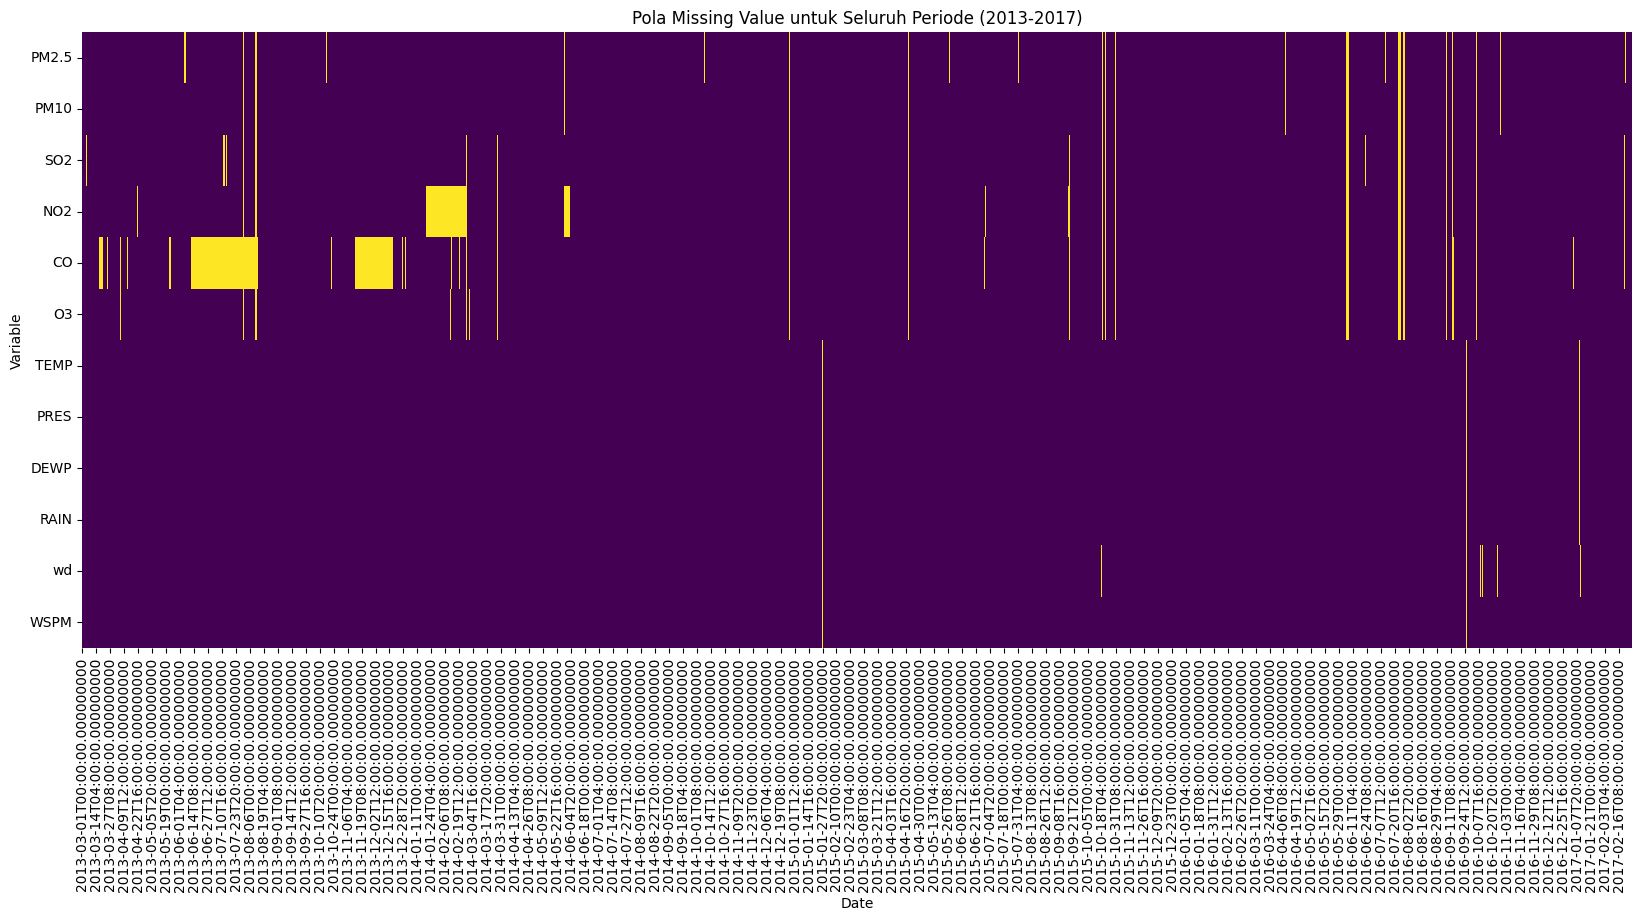

In [5]:
# Jumlah Duplikasi (Duplicated Rows)
duplicated_rows = df.duplicated()
jumlah_duplikasi = duplicated_rows.sum()
print(f"\nJumlah Duplikasi (Duplicated Rows): {jumlah_duplikasi}")

# Total missing values per variabel
print("\nTotal Missing Values untuk Setiap Variabel:")
print(df.isnull().sum())

# Persentase missing value
missing_percentage = df.isnull().mean() * 100
print("\nPersentase Missing Value:")
print(missing_percentage)

# Kolom ke plot
cols_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

# Membuat DataFrame untuk missing value
data_missing = df[cols_to_plot].isnull()
data_missing['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
data_missing.set_index('datetime', inplace=True)

# Plot heatmap untuk missing values agar lebih mudah dilihat pola hilangnya
plt.figure(figsize=(20, 8))
sns.heatmap(data_missing.T, cmap='viridis', cbar=False)
plt.title('Pola Missing Value untuk Seluruh Periode (2013-2017)')
plt.xlabel('Date')
plt.ylabel('Variable')
plt.yticks(rotation=0)
plt.show()

In [6]:
# Isi missing value numerik dengan mean
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

# Isi missing value kategorikal dengan modus
categorical_cols = ['wd']
for col in categorical_cols:
    # Hindari inplace=True dalam chained assignment
    df[col] = df[col].fillna(df[col].mode()[0])

# Cek apakah masih ada missing value
print("Missing Values Setelah Cleaning:\n", df.isnull().sum())

Missing Values Setelah Cleaning:
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Insight:**
- Terdapat persentase data hilang yang relatif rendah untuk sebagian besar polutan dan variabel cuaca. Secara spesifik, PM2.5 memiliki sekitar 2,14% data yang hilang, dan PM10 memiliki sekitar 1,58% data yang hilang.
-
Tingkat kehilangan data untuk Karbon Monoksida (CO) dan Nitrogen Dioksida (NO2) menunjukkan angka yang cukup tinggi dengan persentase masing-masing mencapai sekitar 9,12% dan 4,57%. Kehilangan data ini menunjukkan kemungkinan adanya kendala sistematis dalam mekanisme pengukuran yang memerlukan kajian mendalam.

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
# Rangkuman statistik pada kolom numerikal
summary_stats = df.describe()
print(summary_stats)

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.069131   
std       85.644198     97.442239     22.688062    


--- Analisis Kolom: No ---
Statistik Deskriptif:
count    35064.000000
mean     17532.500000
std      10122.249256
min          1.000000
25%       8766.750000
50%      17532.500000
75%      26298.250000
max      35064.000000
Name: No, dtype: float64


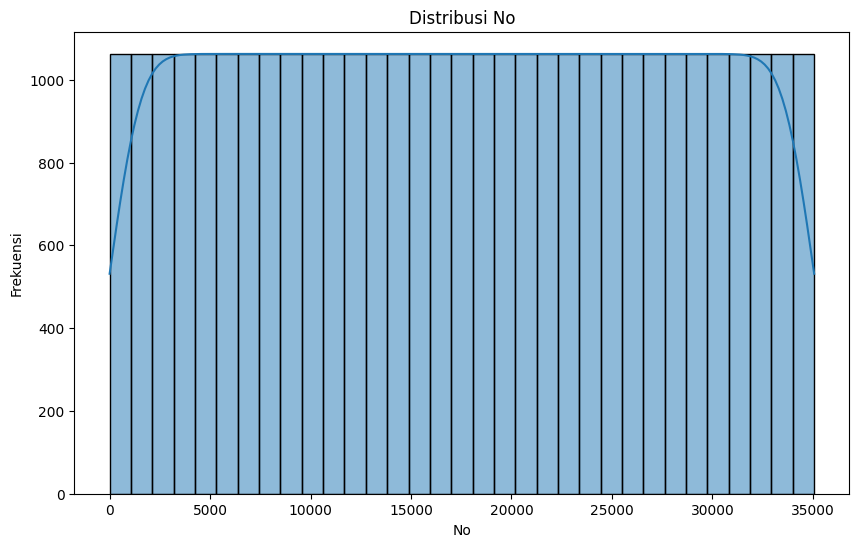

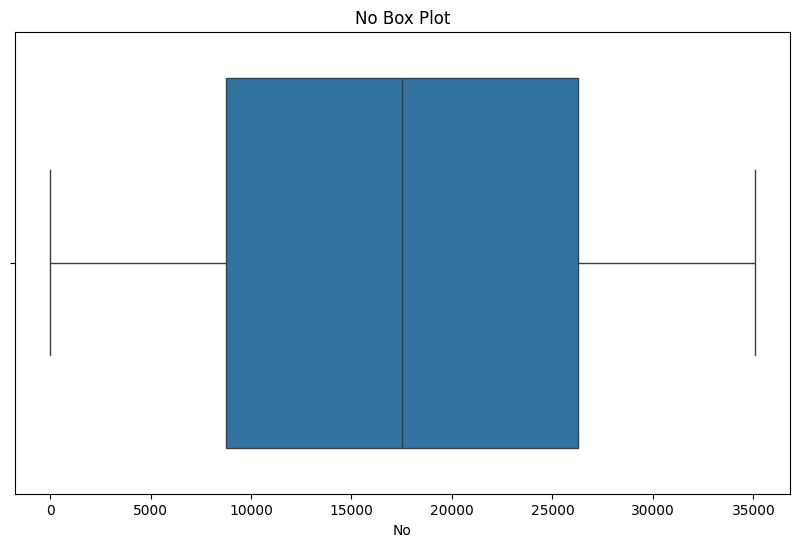


--- Analisis Kolom: year ---
Statistik Deskriptif:
count    35064.000000
mean      2014.662560
std          1.177213
min       2013.000000
25%       2014.000000
50%       2015.000000
75%       2016.000000
max       2017.000000
Name: year, dtype: float64


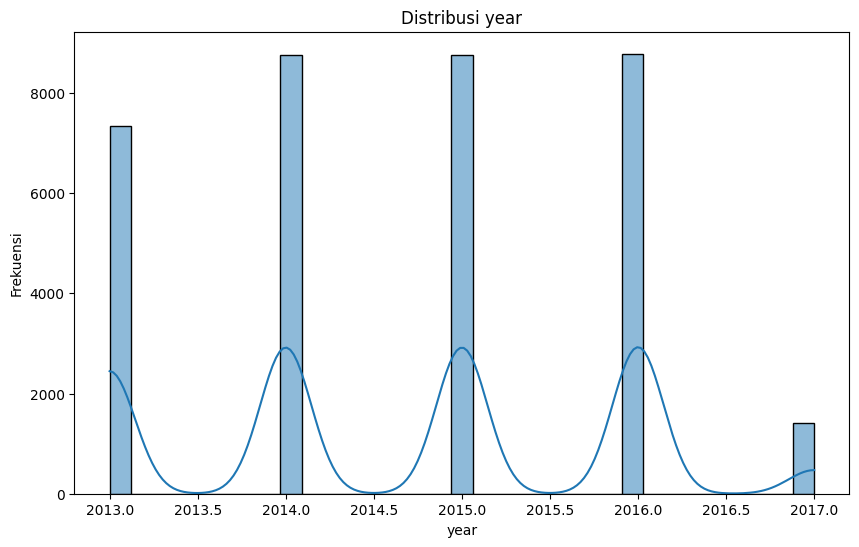

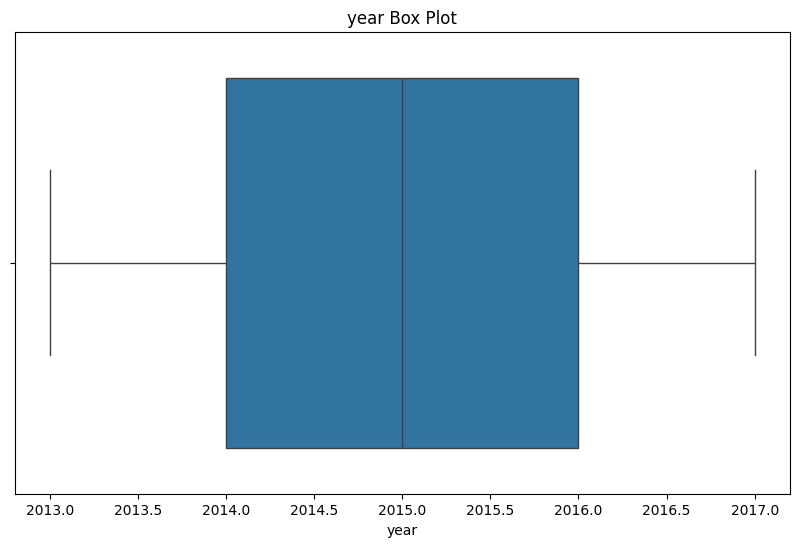


--- Analisis Kolom: month ---
Statistik Deskriptif:
count    35064.000000
mean         6.522930
std          3.448752
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


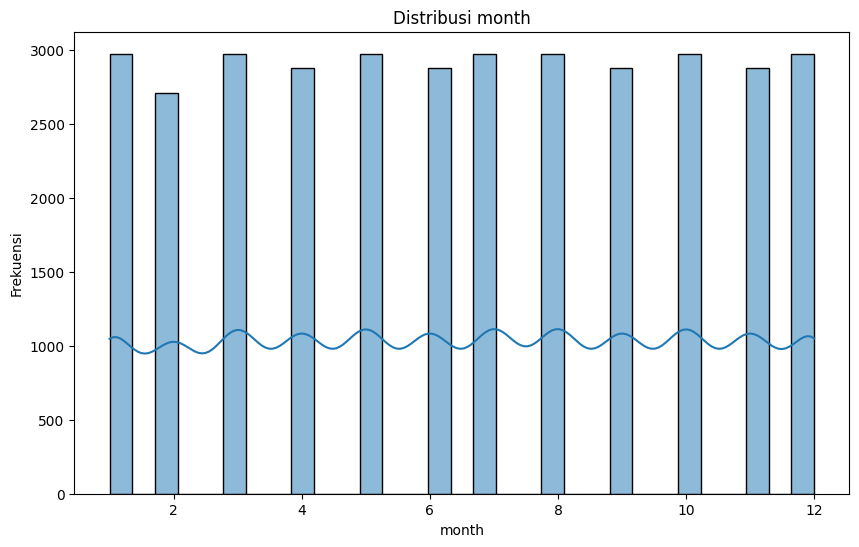

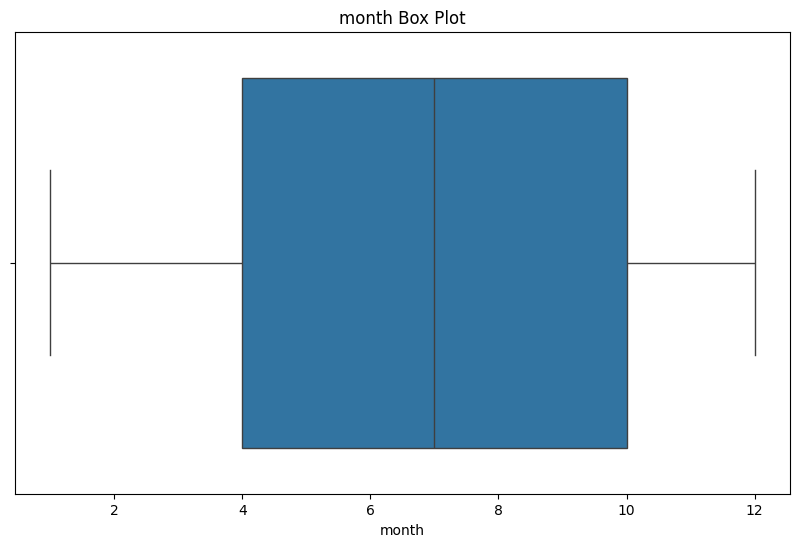


--- Analisis Kolom: day ---
Statistik Deskriptif:
count    35064.000000
mean        15.729637
std          8.800218
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: day, dtype: float64


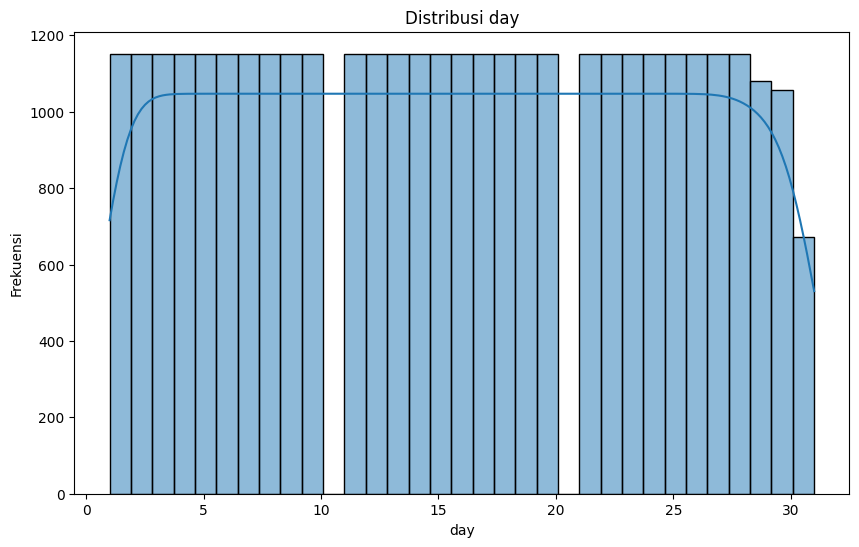

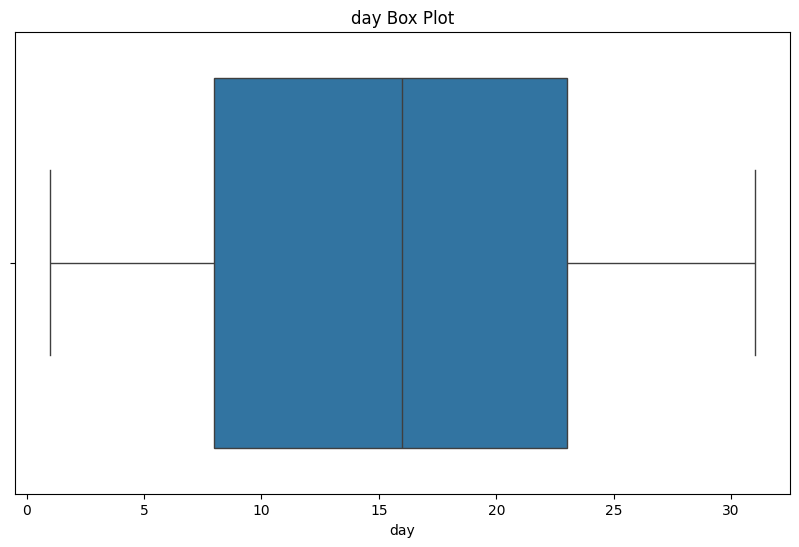


--- Analisis Kolom: hour ---
Statistik Deskriptif:
count    35064.000000
mean        11.500000
std          6.922285
min          0.000000
25%          5.750000
50%         11.500000
75%         17.250000
max         23.000000
Name: hour, dtype: float64


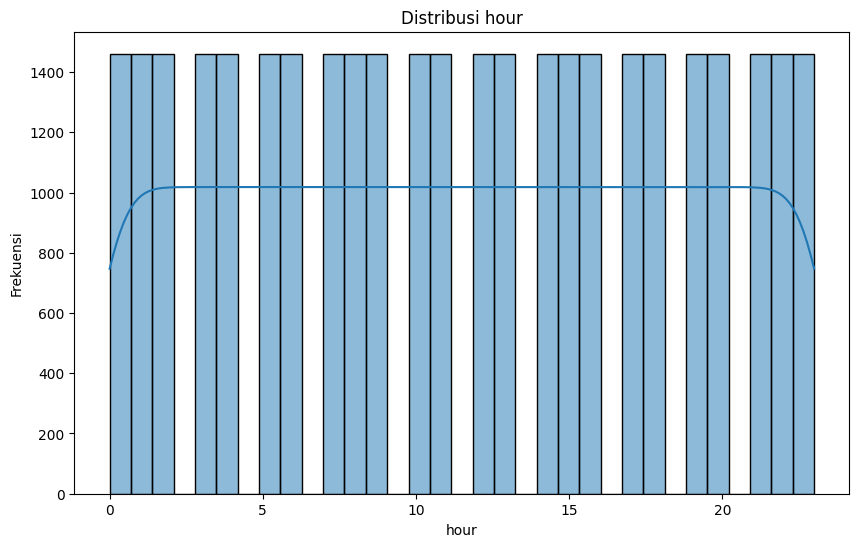

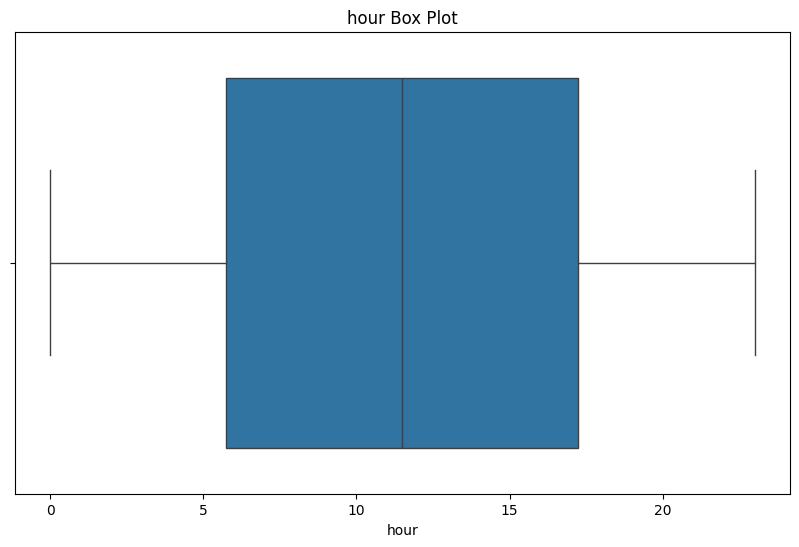


--- Analisis Kolom: PM2.5 ---
Statistik Deskriptif:
count    35064.000000
mean        86.194297
std         85.644198
min          3.000000
25%         23.000000
50%         63.000000
75%        117.000000
max        737.000000
Name: PM2.5, dtype: float64


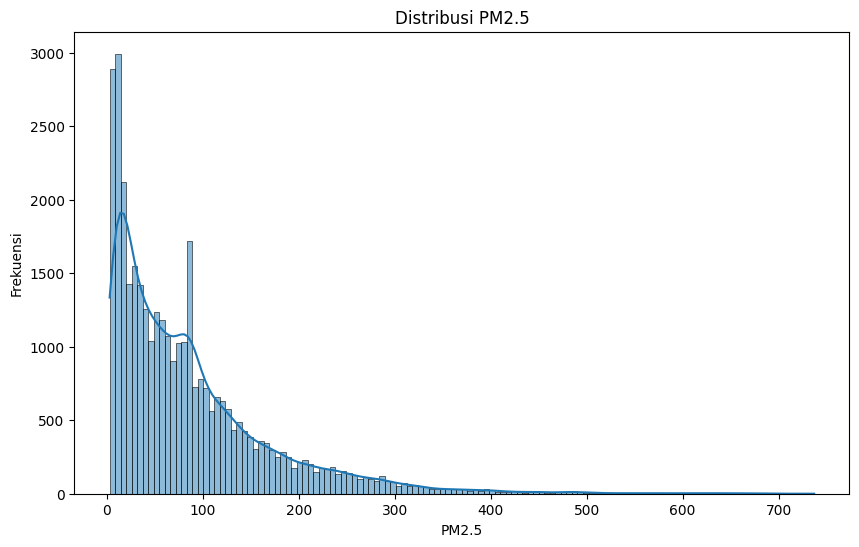

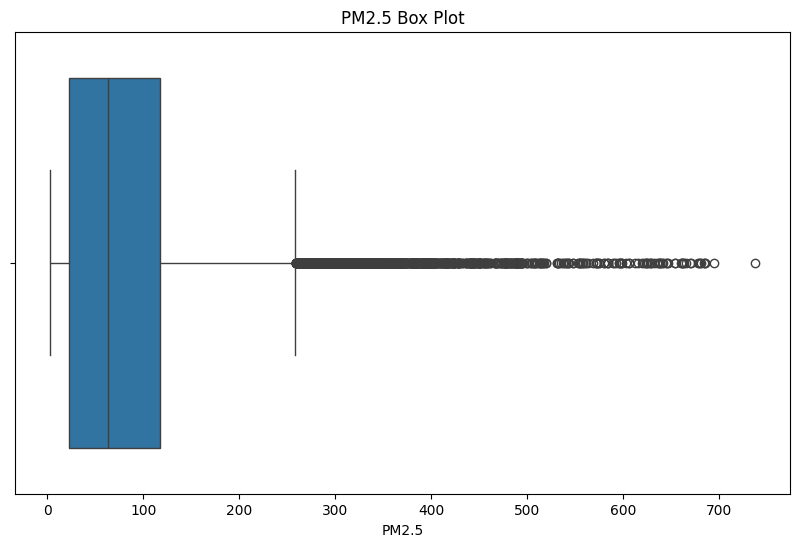


--- Analisis Kolom: PM10 ---
Statistik Deskriptif:
count    35064.000000
mean       110.336742
std         97.442239
min          2.000000
25%         38.000000
50%         88.000000
75%        150.000000
max        955.000000
Name: PM10, dtype: float64


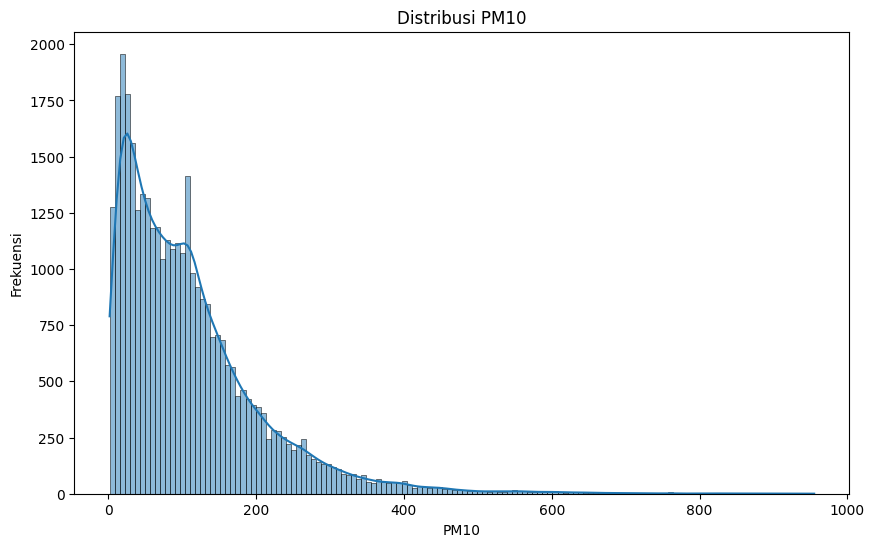

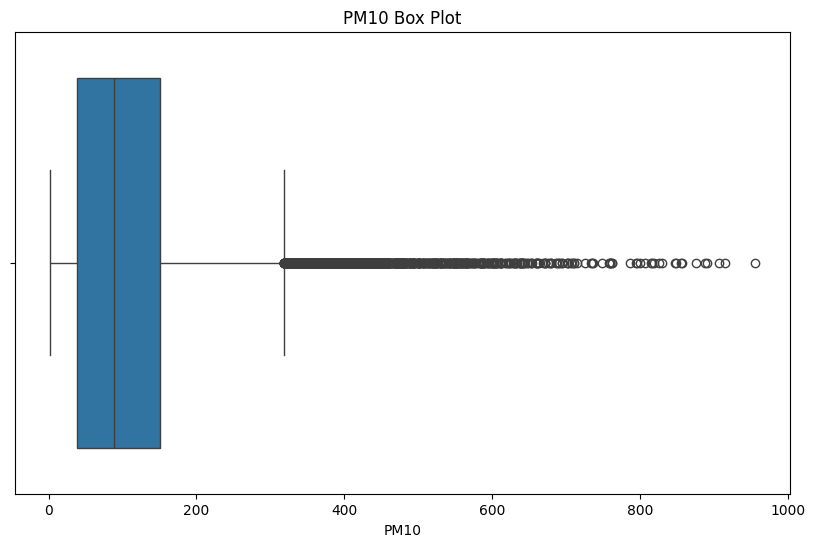


--- Analisis Kolom: SO2 ---
Statistik Deskriptif:
count    35064.000000
mean        18.531107
std         22.688062
min          0.285600
25%          4.000000
50%         10.000000
75%         24.000000
max        300.000000
Name: SO2, dtype: float64


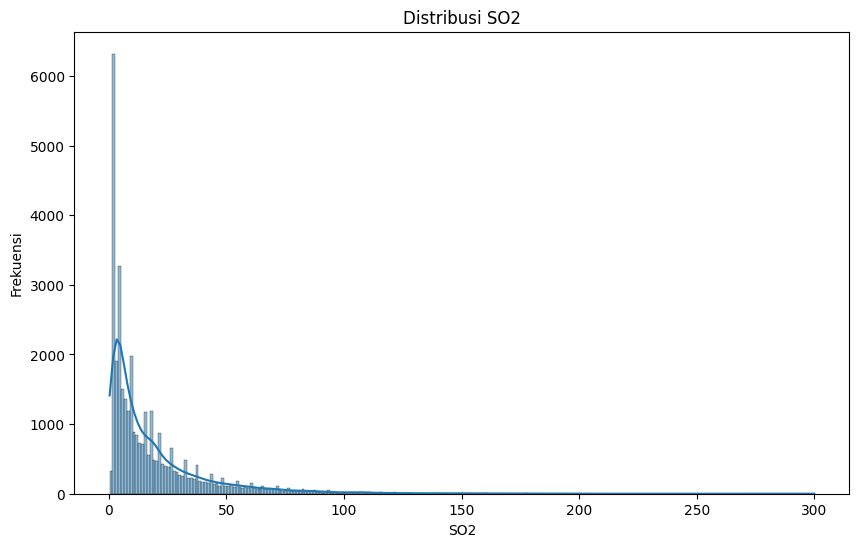

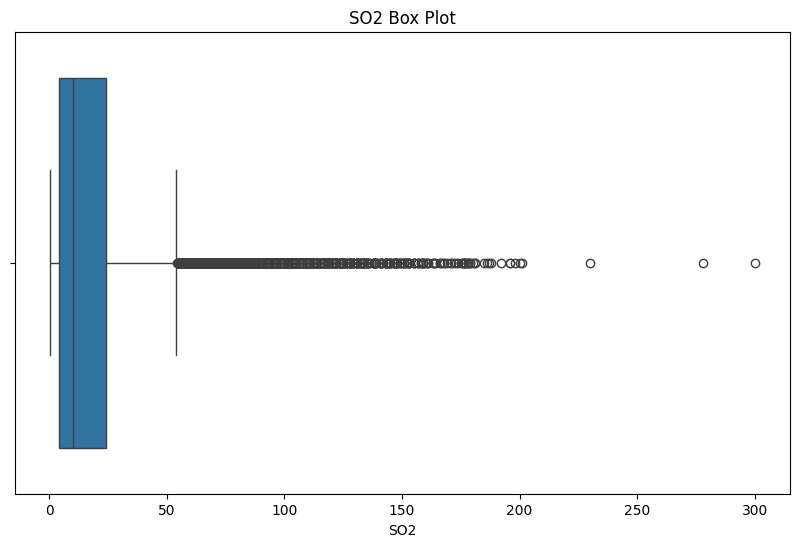


--- Analisis Kolom: NO2 ---
Statistik Deskriptif:
count    35064.000000
mean        53.699443
std         33.174871
min          2.000000
25%         28.000000
50%         49.000000
75%         72.000000
max        258.000000
Name: NO2, dtype: float64


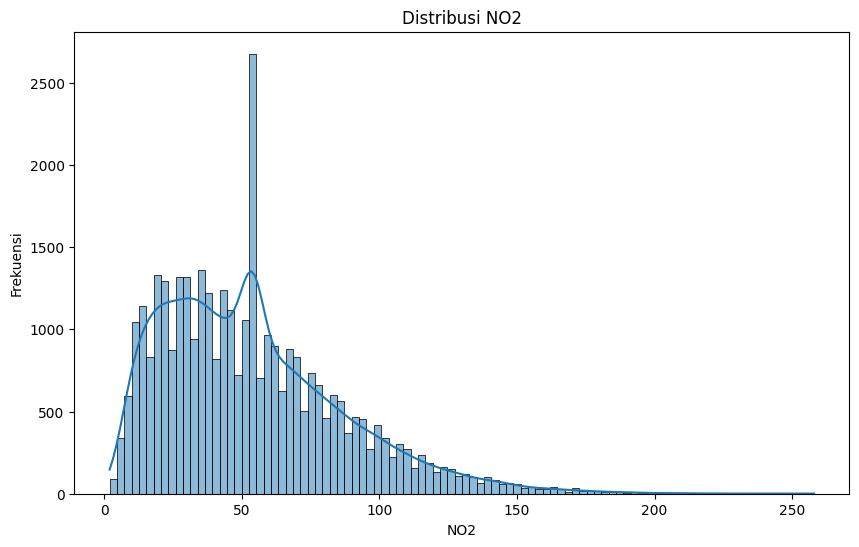

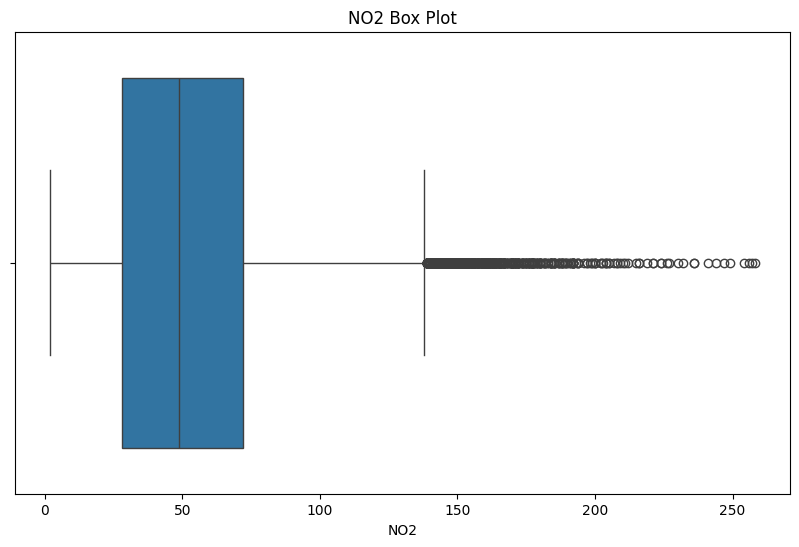


--- Analisis Kolom: CO ---
Statistik Deskriptif:
count    35064.000000
mean      1330.069131
std       1135.697130
min        100.000000
25%        600.000000
50%       1100.000000
75%       1600.000000
max      10000.000000
Name: CO, dtype: float64


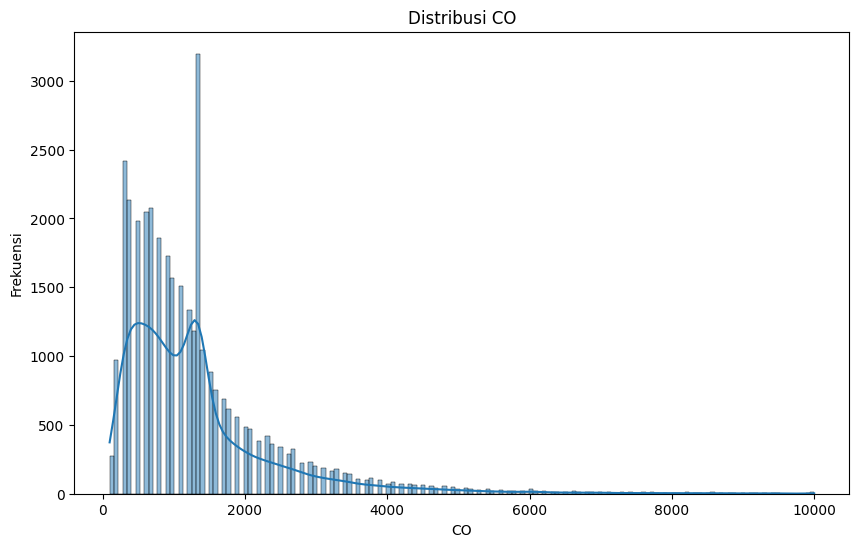

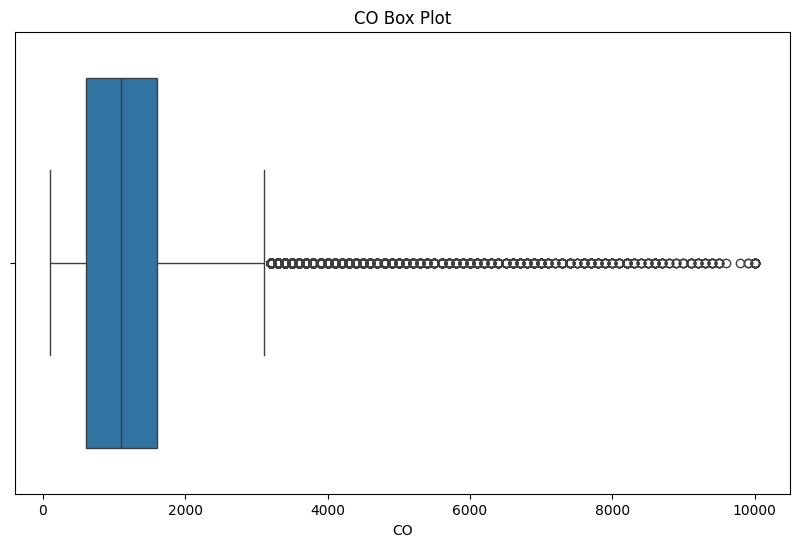


--- Analisis Kolom: O3 ---
Statistik Deskriptif:
count    35064.000000
mean        57.210637
std         57.481150
min          0.642600
25%         13.000000
50%         46.000000
75%         80.000000
max       1071.000000
Name: O3, dtype: float64


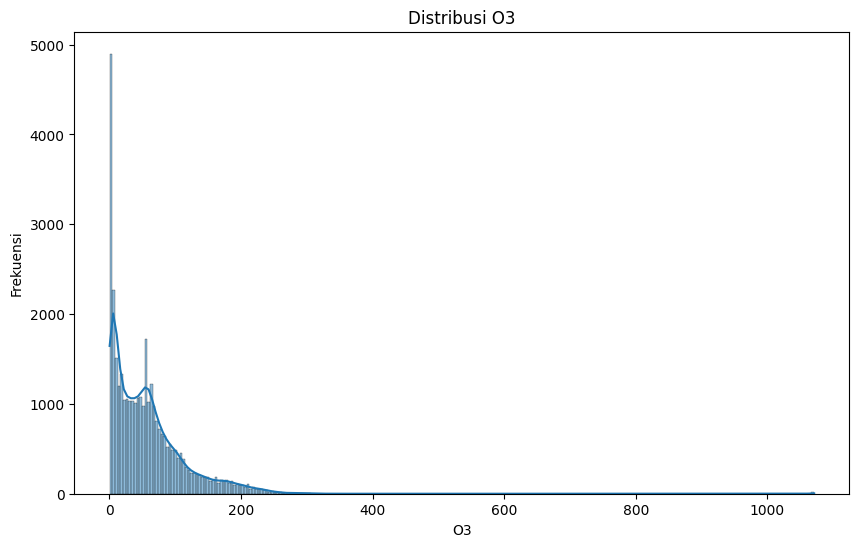

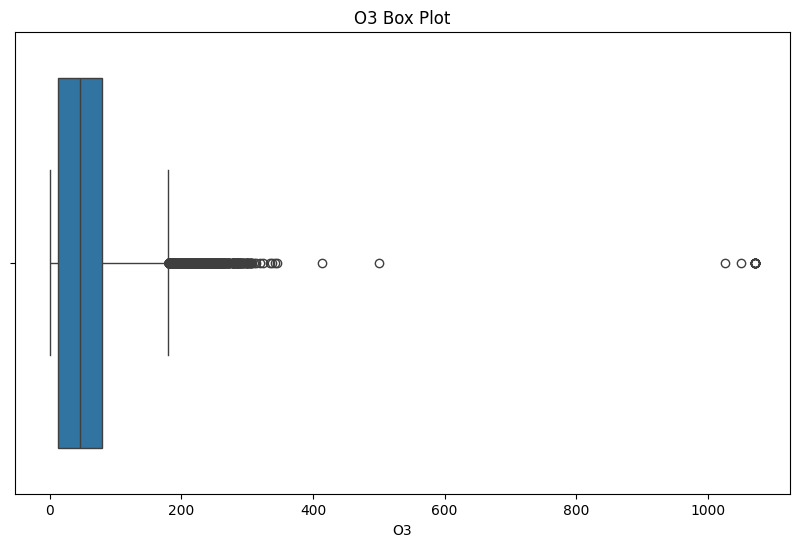


--- Analisis Kolom: TEMP ---
Statistik Deskriptif:
count    35064.00000
mean        13.67149
std         11.45515
min        -16.80000
25%          3.10000
50%         14.60000
75%         23.50000
max         41.10000
Name: TEMP, dtype: float64


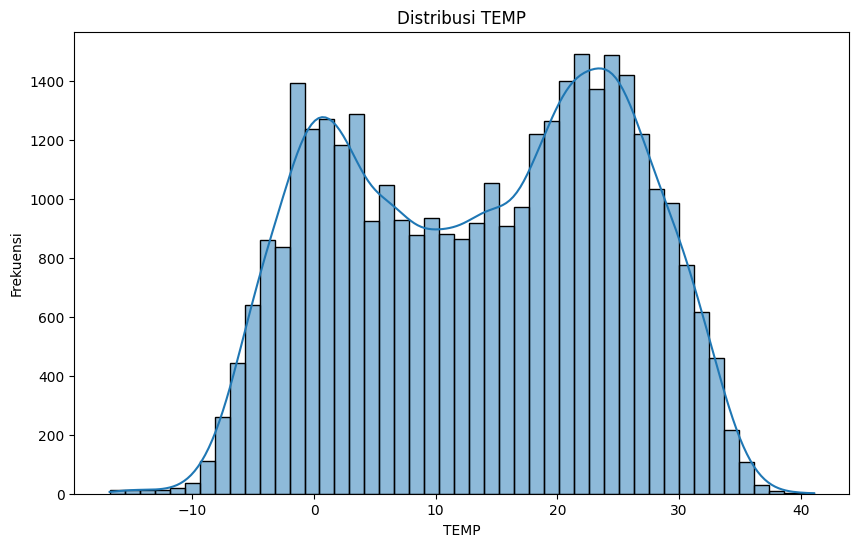

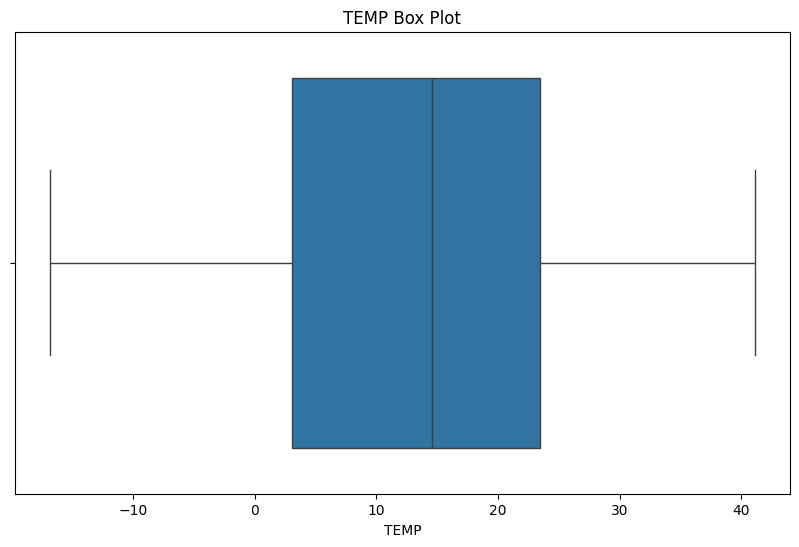


--- Analisis Kolom: PRES ---
Statistik Deskriptif:
count    35064.000000
mean      1012.547419
std         10.263131
min        987.100000
25%       1004.000000
50%       1012.200000
75%       1020.900000
max       1042.000000
Name: PRES, dtype: float64


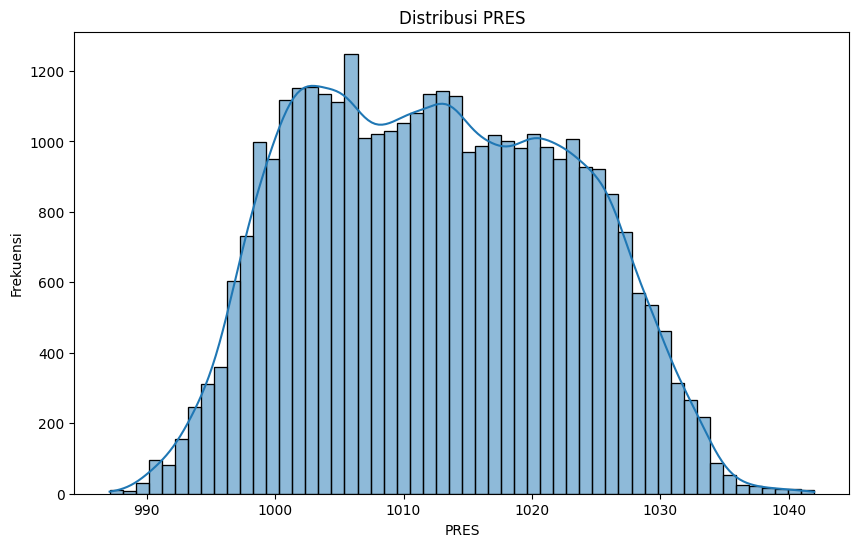

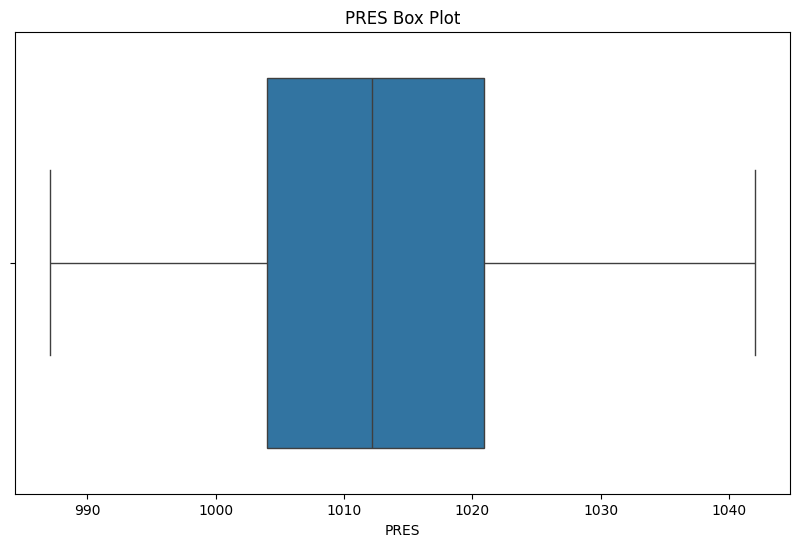


--- Analisis Kolom: DEWP ---
Statistik Deskriptif:
count    35064.000000
mean         2.447535
std         13.806757
min        -35.300000
25%         -8.800000
50%          3.000000
75%         15.000000
max         28.800000
Name: DEWP, dtype: float64


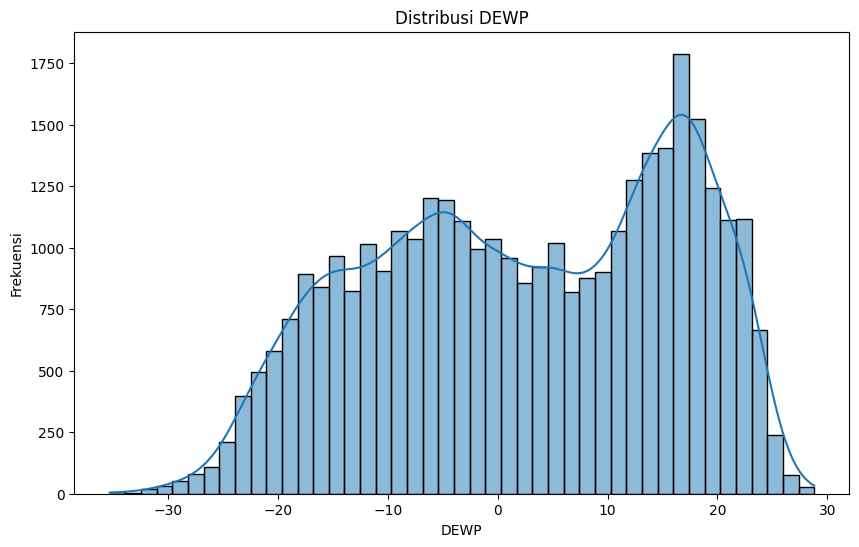

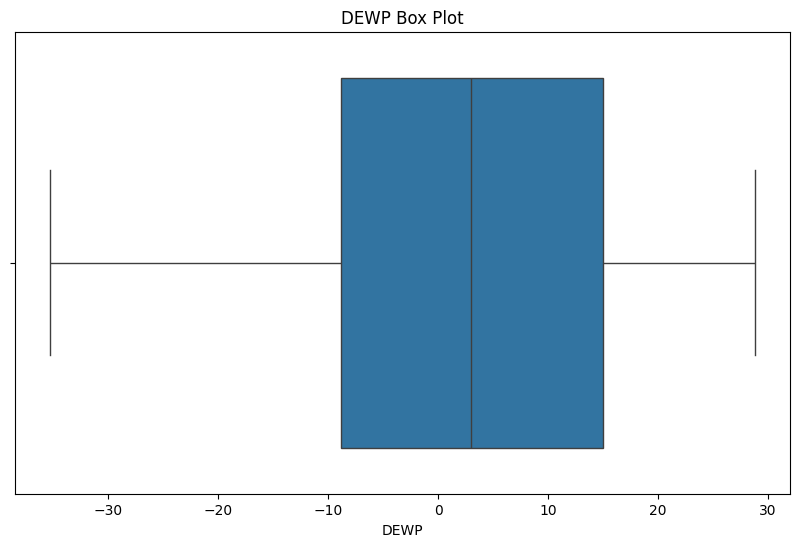


--- Analisis Kolom: RAIN ---
Statistik Deskriptif:
count    35064.000000
mean         0.064020
std          0.786058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         46.400000
Name: RAIN, dtype: float64


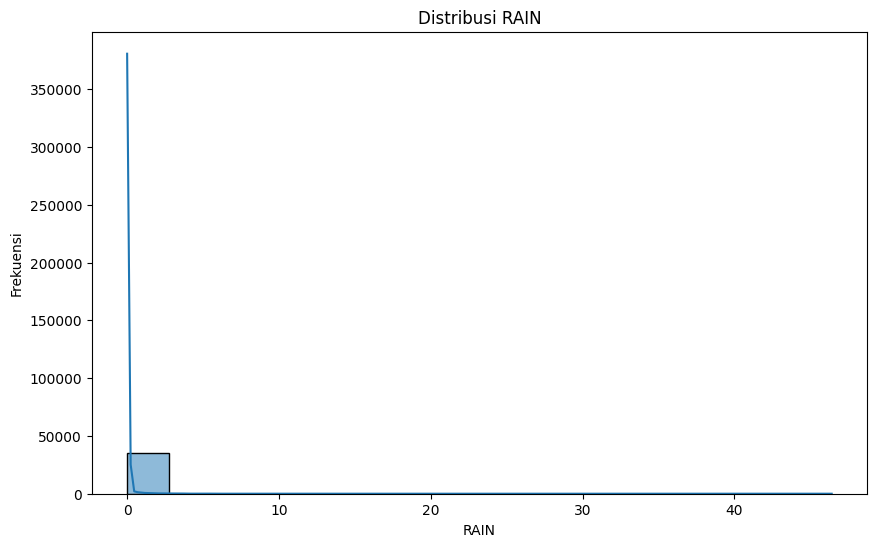

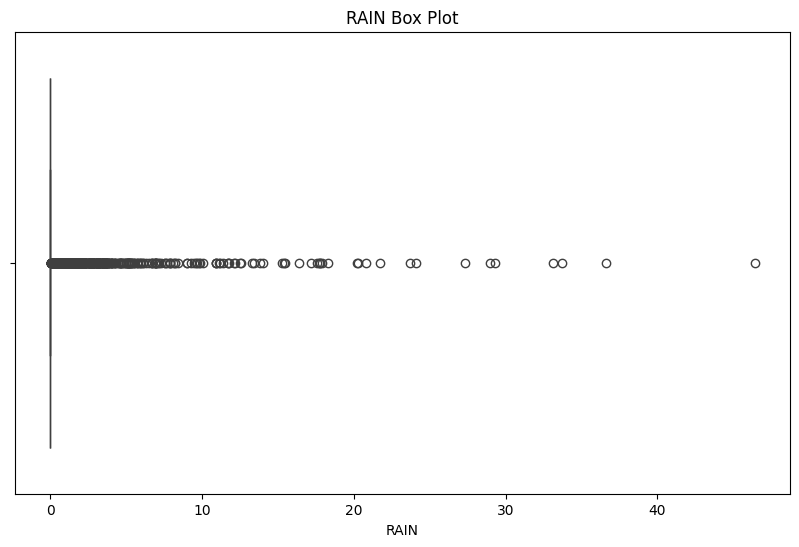


--- Analisis Kolom: WSPM ---
Statistik Deskriptif:
count    35064.000000
mean         1.860785
std          1.280113
min          0.000000
25%          1.000000
50%          1.500000
75%          2.400000
max         10.500000
Name: WSPM, dtype: float64


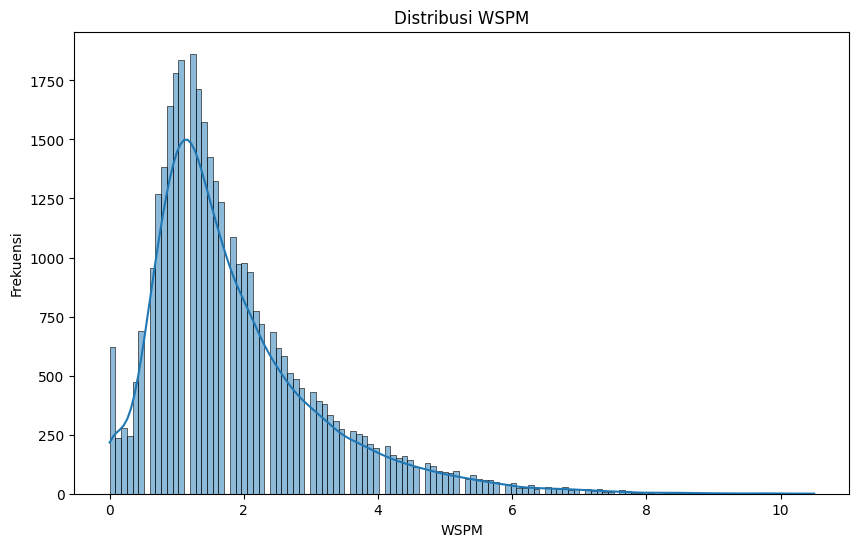

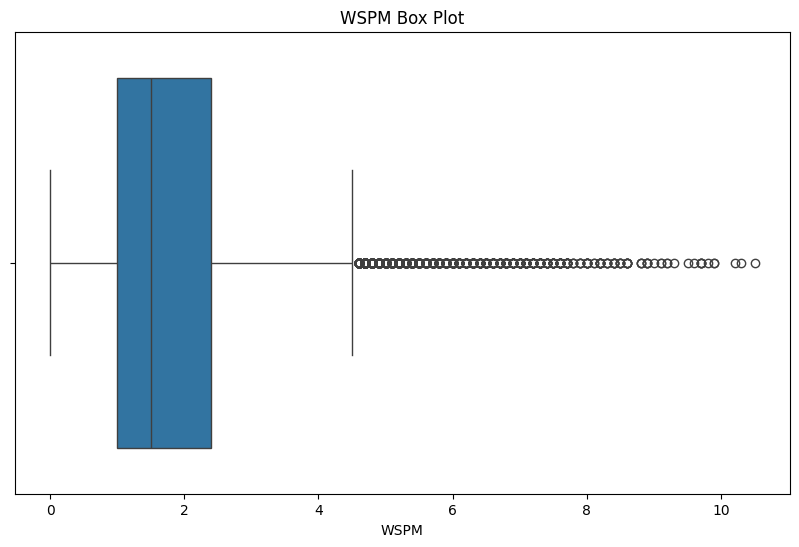

In [10]:
# Melakukan Univariate EDA pada kolom numerikal
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    print(f"\n--- Analisis Kolom: {col} ---")

    # Descriptive Statistics
    print("Statistik Deskriptif:")
    print(df[col].describe())

    # Distribution Plot (Histogram and KDE)
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

    # Box Plot (to visualize outliers)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'{col} Box Plot')
    plt.xlabel(col)
    plt.show()


--- Analisis Kolom: wd ---
Jumlah Kemunculan Kategori:
wd
ENE    3939
E      3564
NE     3540
ESE    2706
SW     2481
NW     2466
SSW    1953
NNE    1928
SE     1880
N      1865
WSW    1769
NNW    1693
S      1547
SSE    1402
WNW    1347
W       984
Name: count, dtype: int64


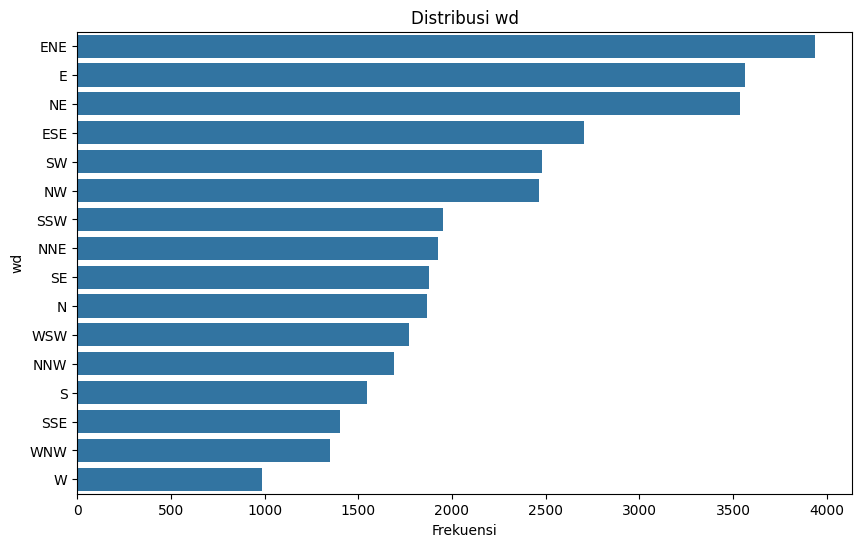


--- Analisis Kolom: station ---
Jumlah Kemunculan Kategori:
station
Dongsi    35064
Name: count, dtype: int64


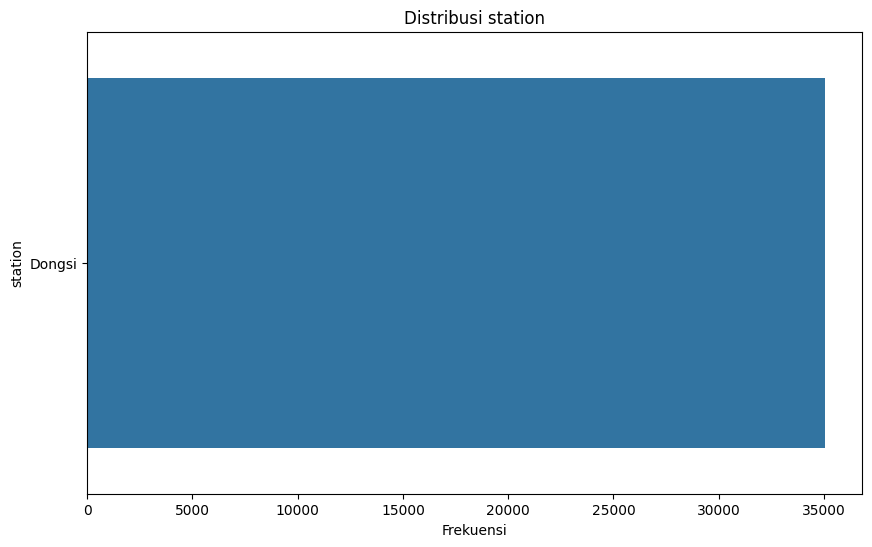

In [11]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    print(f"\n--- Analisis Kolom: {col} ---")

    print("Jumlah Kemunculan Kategori:")
    print(df[col].value_counts())

    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xlabel('Frekuensi')
    plt.ylabel(col)
    plt.show()

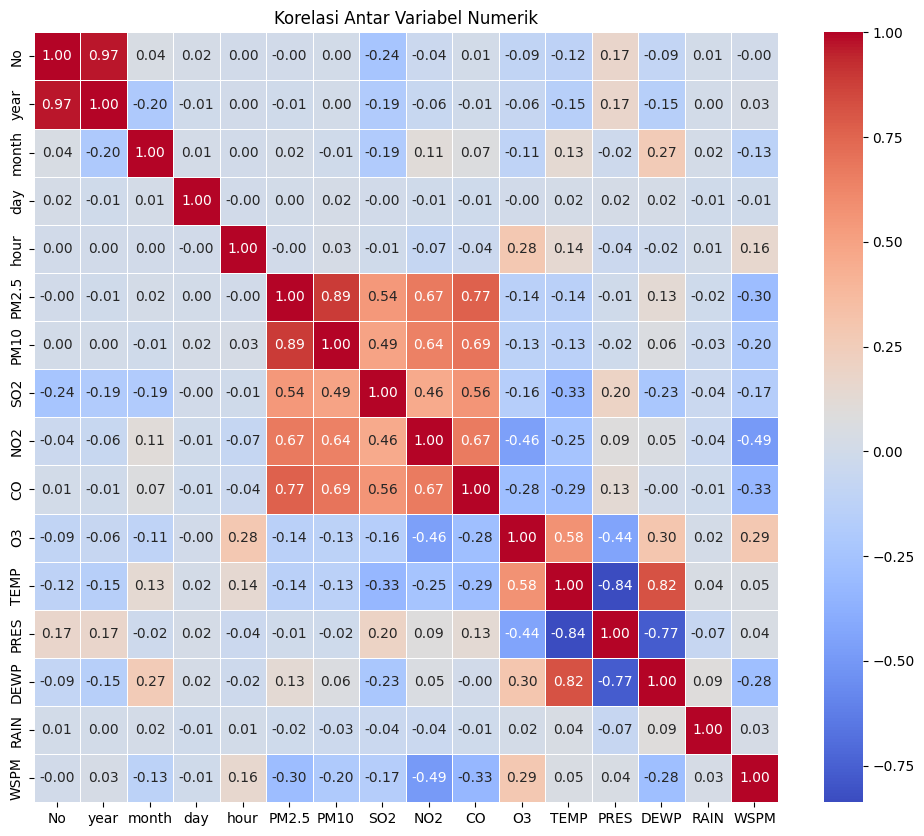

Correlation Matrix (Table Format):
             No          year         month           day          hour  \
No     1.000000  9.695331e-01  4.318051e-02  1.776442e-02  6.838683e-04   
year   0.969533  1.000000e+00 -2.020099e-01 -5.569082e-03  1.164482e-15   
month  0.043181 -2.020099e-01  1.000000e+00  1.052232e-02  4.724770e-16   
day    0.017764 -5.569082e-03  1.052232e-02  1.000000e+00 -4.489555e-17   
hour   0.000684  1.164482e-15  4.724770e-16 -4.489555e-17  1.000000e+00   
PM2.5 -0.003032 -6.830761e-03  1.515112e-02  2.489494e-03 -1.811317e-03   
PM10   0.003703  4.563120e-03 -5.910673e-03  2.355508e-02  2.757698e-02   
SO2   -0.241270 -1.913045e-01 -1.866408e-01 -9.952747e-05 -1.060453e-02   
NO2   -0.036219 -6.116768e-02  1.051075e-01 -5.807638e-03 -7.286124e-02   
CO     0.006691 -1.015892e-02  6.863605e-02 -1.231058e-02 -3.556921e-02   
O3    -0.093319 -6.374890e-02 -1.124191e-01 -4.654282e-03  2.838861e-01   
TEMP  -0.119018 -1.487664e-01  1.325033e-01  1.584680e-02  1.4207

In [13]:
# Multivariate EDA (Korelasi antar variabel numerik)
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

# Menampilkan Tabel Matriks
print("Correlation Matrix (Table Format):")
print(correlation_matrix)

**Insight:**
- Distribusi PM2.5 menunjukkan karakteristik yang sangat miring ke kanan dengan adanya nilai-nilai ekstrem yang tinggi. Dengan rata-rata (86.19) yang jauh lebih tinggi dari median (63.0), distribusi PM2.5 memiliki ekor panjang ke arah nilai tinggi, mengindikasikan ketidaksimetrisan data. Nilai maksimum yang mencapai 737.02 hampir enam kali lipat dari kuartil ketiga (117.02) menunjukkan adanya kejadian polusi udara ekstrem yang berpotensi menjadi outlier. Pola ini mengisyaratkan bahwa meskipun sebagian besar waktu konsentrasi PM2.5 berada pada level moderat, terdapat periode-periode tertentu dengan tingkat polusi yang sangat berbahaya.
- Analisis korelasi mengungkapkan pola ko-polusi yang signifikan di mana berbagai polutan udara menunjukkan hubungan positif yang kuat dan konsisten. PM2.5 berkorelasi sangat kuat dengan PM10 (0.89), CO (0.77), dan NO2 (0.67), sementara PM10 juga menunjukkan korelasi kuat dengan CO (0.69) dan NO2 (0.64). SO2 memperlihatkan korelasi moderat hingga kuat dengan semua polutan lainnya, berkisar dari 0.46 hingga 0.56. Pola korelasi positif yang tinggi ini mengindikasikan bahwa polutan-polutan tersebut sering muncul bersamaan dalam konsentrasi tinggi, dan berasal dari sumber emisi yang serupa di area perkotaan, sumbernya antara lain seperti lalu lintas kendaraan bermotor, pembakaran bahan bakar fosil di industri dan pembangkit listrik, serta berbagai proses pembakaran lainnya.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana dinamika perubahan partikel PM2.5 di Dongsi?

In [ ]:
# Konversi komponen penanggalan ke datetime index
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)
df.drop(columns=['No', 'year', 'month', 'day', 'hour'], inplace=True)

In [ ]:
# Resample data
hourly_pm25 = df['PM2.5'].resample('h').mean()
daily_pm25 = df['PM2.5'].resample('D').mean()
monthly_pm25 = df['PM2.5'].resample('ME').mean()
yearly_pm25 = df['PM2.5'].resample('YE').mean()

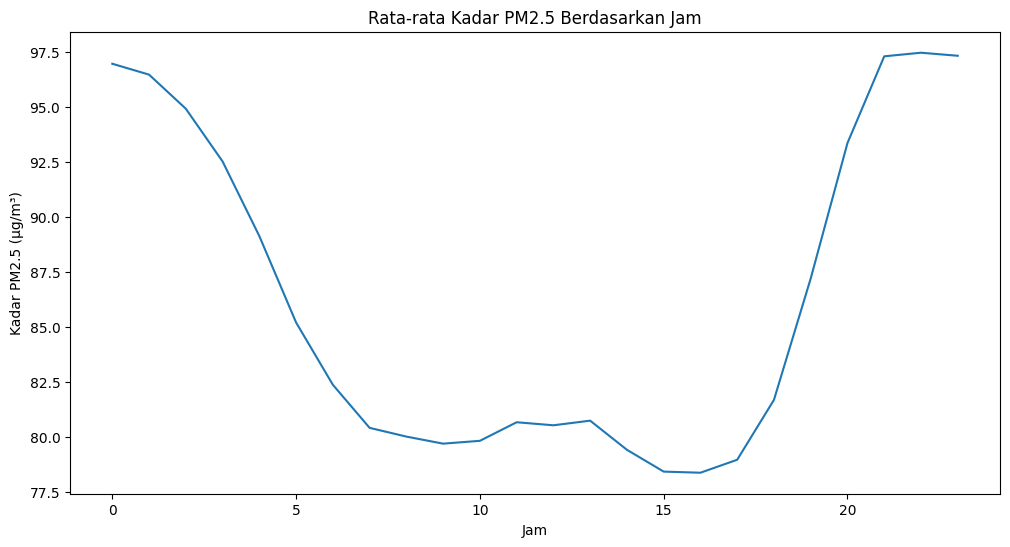

In [ ]:
# Kalkulasi rata-rata PM2.5 berdasarkan jam
hourly_avg_pm25 = df['PM2.5'].groupby(df.index.hour).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_avg_pm25.index, y=hourly_avg_pm25.values)
plt.title("Rata-rata Kadar PM2.5 Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Kadar PM2.5 (μg/m³)")
plt.show()

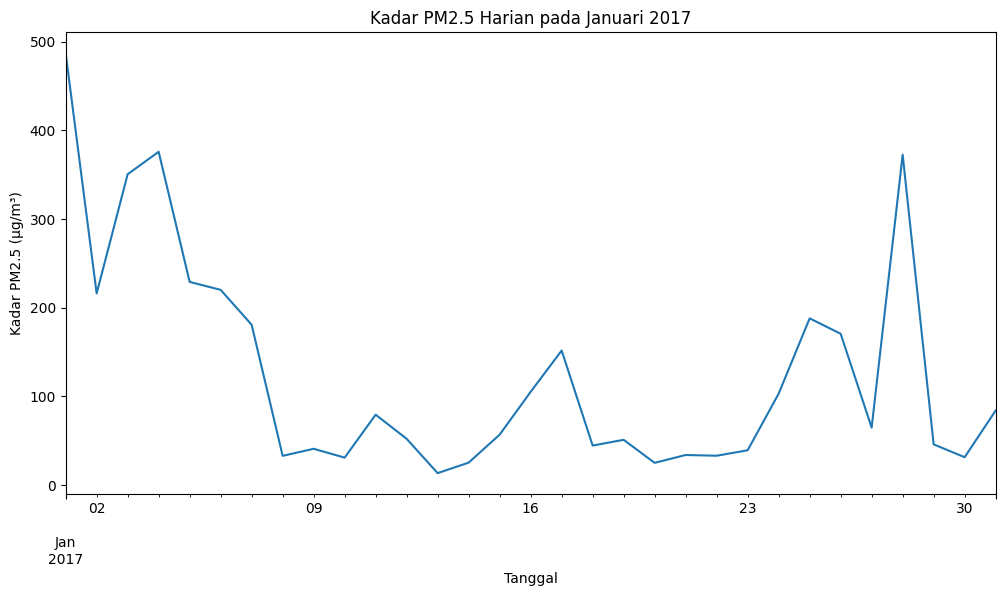

In [ ]:
# Kadar level PM2.5 harian (Studi kasus : January 2017)
daily_pm25['2017-01'].plot(figsize=(12, 6), title="Kadar PM2.5 Harian pada Januari 2017")
plt.xlabel("Tanggal")
plt.ylabel("Kadar PM2.5 (μg/m³)")
plt.show()

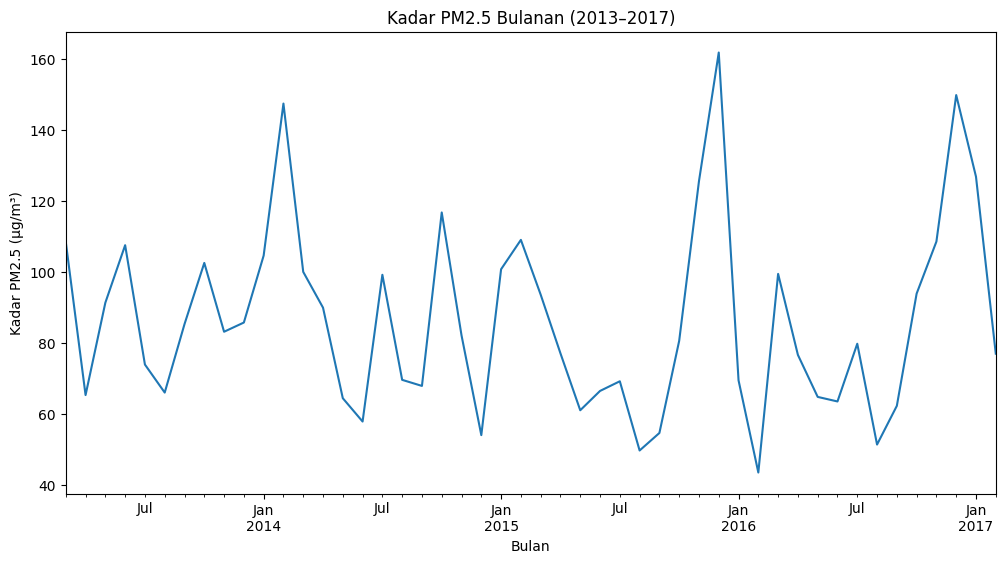

In [ ]:
# Plot PM2.5 bulanan
monthly_pm25.plot(figsize=(12, 6), title="Kadar PM2.5 Bulanan (2013–2017)")
plt.xlabel("Bulan")
plt.ylabel("Kadar PM2.5 (μg/m³)")
plt.show()

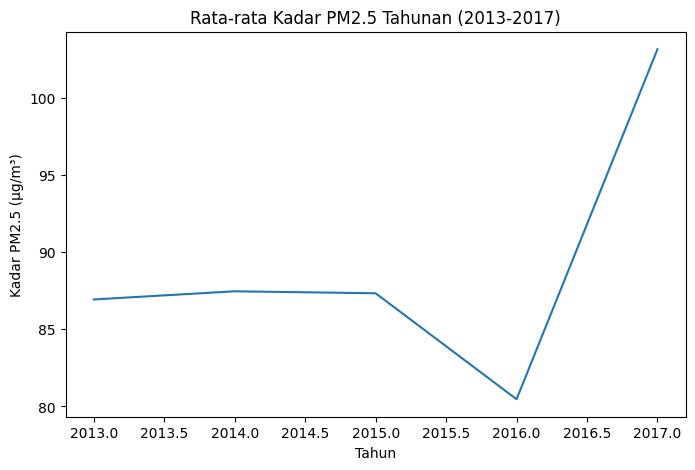


Rata-rata Kadar PM2.5 Tahunan (2013-2017):


,Tahun,Rata-rata PM2.5 (μg/m³)
0,2013,86.925760
1,2014,87.455485
2,2015,87.326436
3,2016,80.465800
4,2017,103.130529


In [ ]:
# Plot PM2.5 tahunan
plt.figure(figsize=(8, 5))
sns.lineplot(x=yearly_pm25.index.year, y=yearly_pm25.values)
plt.title("Rata-rata Kadar PM2.5 Tahunan (2013-2017)")
plt.xlabel("Tahun")
plt.ylabel("Kadar PM2.5 (μg/m³)")
plt.show()

# Tabel rata-rata PM2.5 tahunan
yearly_pm25_table = yearly_pm25.reset_index()
yearly_pm25_table.columns = ['Tahun', 'Rata-rata PM2.5 (μg/m³)']
yearly_pm25_table['Tahun'] = yearly_pm25_table['Tahun'].dt.year
print("\nRata-rata Kadar PM2.5 Tahunan (2013-2017):")
yearly_pm25_table

### Pertanyaan 2: Bagaimana korelasi antara faktor-faktor iklim di Dongsi dengan kadar partikel PM2.5?

In [ ]:
# Kolom untuk analisis korelasi
relevant_cols = ['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df_corr = df[relevant_cols]

# Menghitung korelasi matriks
correlation_matrix = df_corr.corr()

correlation_matrix

,PM2.5,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,-0.137235,-0.005948,0.127810,-0.018986,-0.298772
TEMP,-0.137235,1.000000,-0.837480,0.819070,0.038660,0.048829
PRES,-0.005948,-0.837480,1.000000,-0.770305,-0.065779,0.038493
DEWP,0.127810,0.819070,-0.770305,1.000000,0.089356,-0.278895
RAIN,-0.018986,0.038660,-0.065779,0.089356,1.000000,0.025547
WSPM,-0.298772,0.048829,0.038493,-0.278895,0.025547,1.000000


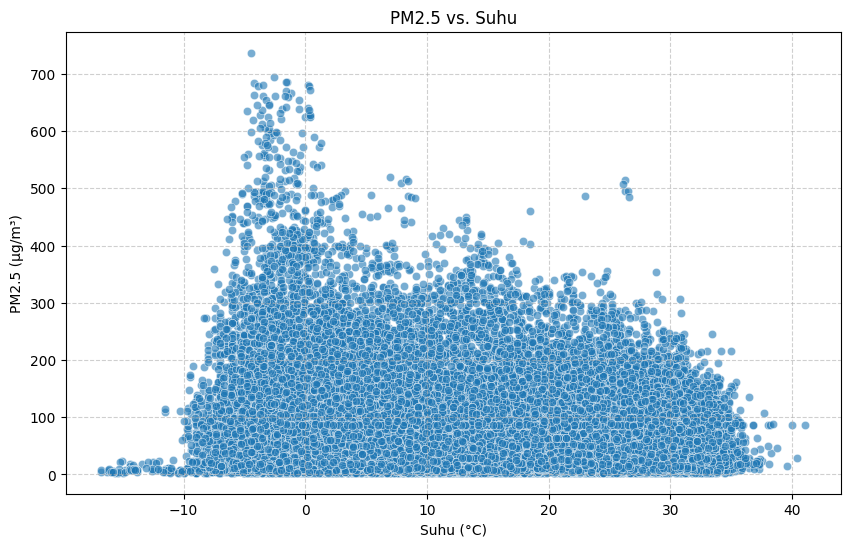

In [ ]:
# Plot PM2.5 vs Suhu

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TEMP', y='PM2.5', alpha=0.6)
plt.title('PM2.5 vs. Suhu')
plt.xlabel('Suhu (°C)')
plt.ylabel('PM2.5 (μg/m³)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

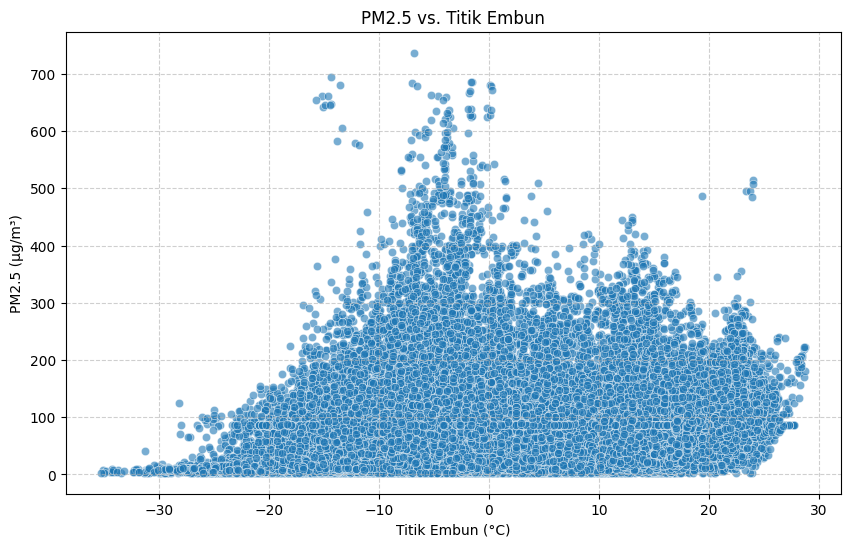

In [ ]:
# Plot PM2.5 vs Titik Embun
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DEWP', y='PM2.5', alpha=0.6)
plt.title('PM2.5 vs. Titik Embun')
plt.xlabel('Titik Embun (°C)')
plt.ylabel('PM2.5 (μg/m³)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

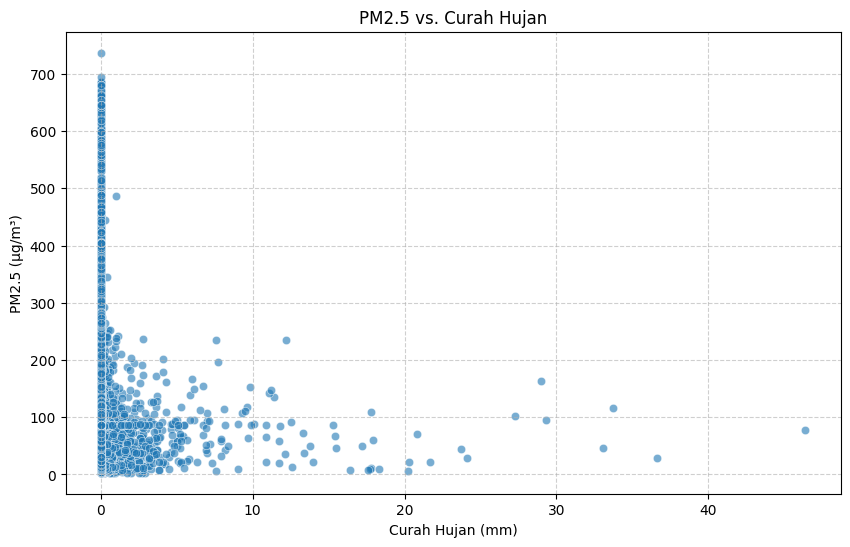

In [ ]:
# Plot PM2.5 vs Curah Hujan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAIN', y='PM2.5', alpha=0.6)
plt.title('PM2.5 vs. Curah Hujan')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('PM2.5 (μg/m³)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

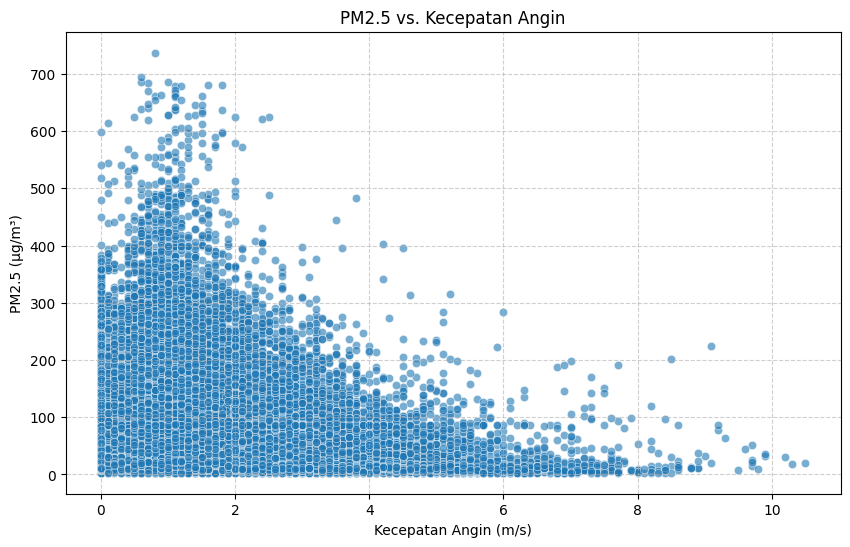

In [ ]:
# Plot PM2.5 vs Kecepatan Angin
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='WSPM', y='PM2.5', alpha=0.6)
plt.title('PM2.5 vs. Kecepatan Angin')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('PM2.5 (μg/m³)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Insight:**
- Dalam daily basis, PM2.5 menunjukkan siklus diurnal yang jelas, dengan puncaknya terjadi pada pagi hari dan sore menuju malam
- Curah hujan memiliki korelasi negatif terhadap PM2.5

## Analisis Lanjutan (Opsional)

## Conclusion

- Analisis menunjukkan bahwa konsentrasi PM2.5 di Dongsi menunjukkan pola musiman dan diurnal yang jelas. Tingkat PM2.5 yang lebih tinggi secara konsisten diamati selama bulan-bulan musim dingin karena berkurangnya dispersi atmosfer, peningkatan emisi pemanasan, dan kondisi cuaca yang stagnan. Sebaliknya, bulan-bulan musim panas menunjukkan konsentrasi PM2.5 yang lebih rendah, kemungkinan besar karena angin yang lebih kuat dan curah hujan yang lebih banyak membantu penyebaran polutan.
- Faktor-faktor iklim memainkan peran penting dalam memodulasi tingkat PM2.5. Kecepatan angin menunjukkan korelasi negatif yang kuat dengan PM2.5, karena kecepatan angin yang lebih tinggi meningkatkan penyebaran polutan dan mengurangi konsentrasi. Suhu menunjukkan korelasi negatif yang lemah, dengan suhu yang lebih hangat meningkatkan pencampuran atmosfer yang lebih baik dan menurunkan tingkat PM2.5. Suhu titik embun menunjukkan korelasi positif yang sedang, menunjukkan bahwa kelembapan yang lebih tinggi dapat berkontribusi pada pembentukan aerosol sekunder, yang meningkatkan PM2.5. Curah hujan juga berkorelasi negatif dengan PM2.5, yang bertindak sebagai mekanisme pembersihan alami dengan membersihkan materi partikulat. Wawasan ini menggarisbawahi pentingnya faktor meteorologi dalam membentuk dinamika kualitas udara.